In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df  = pd.read_csv("SOCR-HeightWeight.csv")

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0.5, 0, 'Height (inches)')

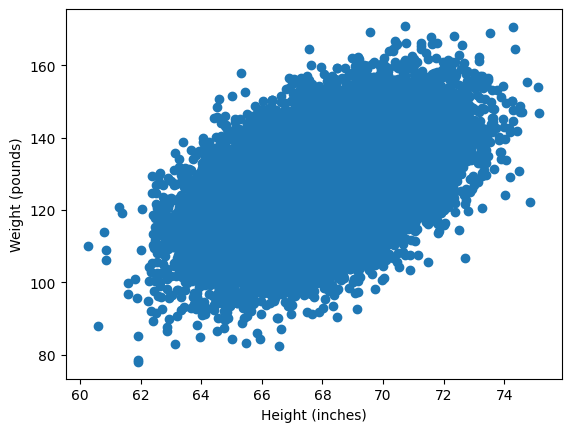

In [5]:
##scatter plot
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.ylabel('Weight (pounds)')
plt.xlabel('Height (inches)')

In [6]:
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


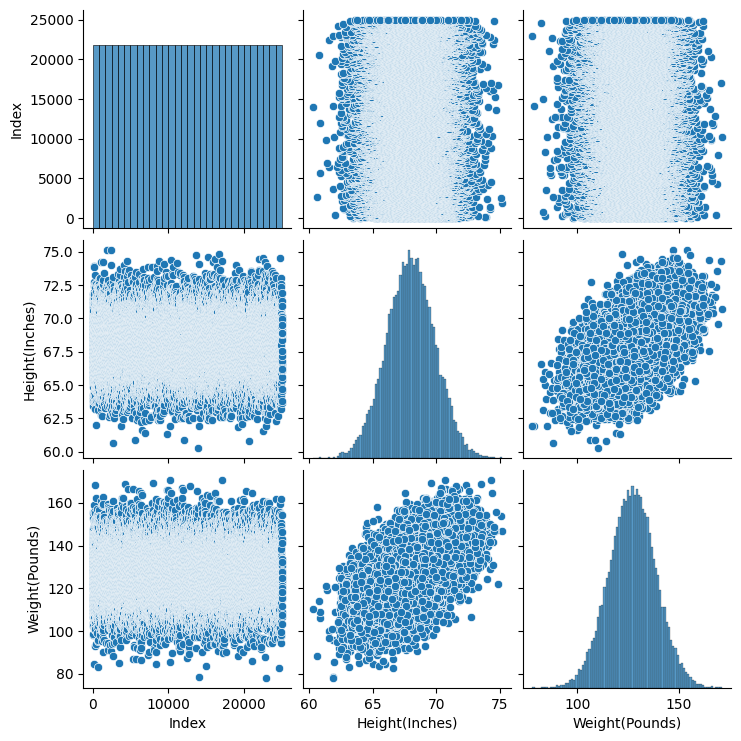

In [7]:
#seaborn visualisation
import seaborn as sns
sns.pairplot(df)

In [8]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [9]:
## independent and dedpendent feature
x = df[['Weight(Pounds)']] ## independent features should be a dataframe or 2-d arrays
y = df['Height(Inches)']

In [10]:
#training test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=48)


In [11]:
#standardisation
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
#applying simple linear regression
from sklearn.linear_model import LinearRegression


In [15]:
regression = LinearRegression(n_jobs=-1)

In [16]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [18]:
print("Slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)


Slope :  [0.958031]
Intercept :  68.004027912


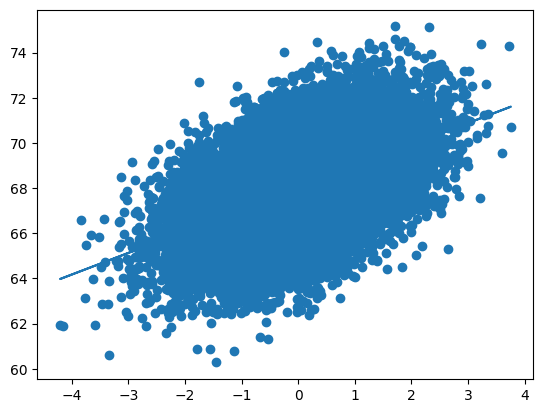

In [21]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train))


In [22]:
#prediction for test data
regression.predict(X_test)

array([67.67082563, 68.82063044, 67.2249402 , ..., 67.98341036,
       68.95103973, 68.11359786])

In [24]:
y_pred = regression.predict(X_test)

In [25]:
#performance matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [28]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(mse)

2.7457689473061215
1.3218435384211134
2.7457689473061215


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2 = r2_score(Y_test, y_pred)
print(r2)

0.24737109538370727


In [34]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(Y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[-0.33320228  0.81660253 -0.77908771 ... -0.02061755  0.94701182
  0.10956995]


In [38]:
#prediction for new data
regression.predict(scaler.transform([[162]]))

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([70.87060106])